In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [12]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

Y_train.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


In [3]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

### Transform into np array

In [4]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

### Reshape dimensions
reshaping y to be m*1 vector (m is the number of datapoints)

In [5]:
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

## !!! REMEMBER TO ALWAYS CHECK THE SIZES OF THE DATASETS

In [6]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (891, 7)
Shape of Y_train :  (891, 1)
Shape of X_test :  (418, 7)
Shape of Y_test :  (418, 1)


# Logistic regression Model

### Sigmoid function

In [7]:
def sigmoid (x):
    return 1/(1+np.exp(-x))

### Model :

In [10]:
def logistic_regression_model(X, y, learning_rate, iterations):
    """
    
    Logistic regression model using gradient descent.
    
    Parameters:
    X : numpy array, feature matrix (m x n)
    y : numpy array, target vector (m,)
    learning_rate : float, step size for gradient descent
    iterations : int, number of iterations for gradient descent
    
    Returns:
    W : numpy array, optimized weight vector
    B : float, optimized bias
    cost_list : list of costs at each iteration

    """
    m = y.size

    
    W = np.zeros((X.shape[1],1))
    B = 0
    
    cost_list = []
    y = y.reshape(-1,1)
    epsilon = 1e-10 #to avoid errors in log (division by zero)
    
    for i in range(iterations):
        
        Z = np.dot(X,W) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( y*np.log(A + epsilon) + (1-y)*np.log(1-A + epsilon))
        
        # Gradient Descent
        dW = (1/m)*np.dot(X.T , A -y)
        dB = (1/m)*np.sum(A - y)
        
        W = W - learning_rate*dW
        B = B - learning_rate*dB
        
        # Keeping track of cost value (should be decreasing)
        cost_list.append(cost)
        
    plt.plot(np.arange(iterations),cost_list)
    plt.xlabel('iterations')
    plt.ylabel('cost value')
    plt.title('COST FUNCTION OVER ITERATIONS')
    plt.show()

        
    return W, B, cost_list
        

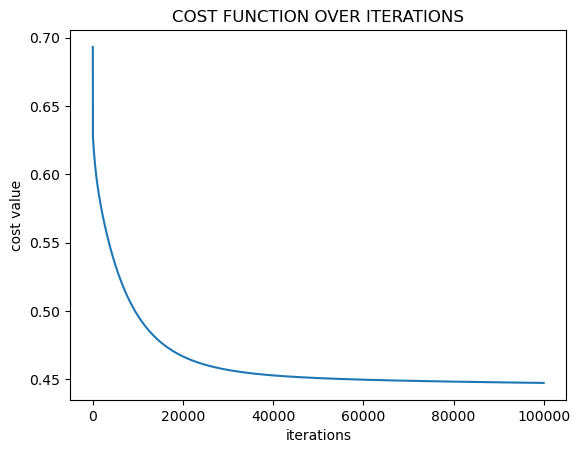

In [11]:
iterations = 100000
learning_rate = 0.0015
# Note that the choices of iteration and learning rate are important !
W, B, cost_list = logistic_regression_model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

## Testing accuracy

In [12]:
def accuracy (X,Y,W,B):
    Z = np.dot(X,W) + B
    A = sigmoid(Z)
    
    A = A > 0.5 # A becomes a np array of booleans

    A= np.array(A , dtype='int') # 1 if >0.5 , else 0 (A becomes a np array of 0 and 1)

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[0])*100   # *100 to make it in percentage
    return acc

In [13]:
accuracy (X_test,Y_test,W,B)

np.float64(91.38755980861244)